In [1]:
# import libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import seaborn as sns

In [2]:
# Read in data
no_df = pd.read_csv("KaggleV2-May-2016.csv", parse_dates=["ScheduledDay", "AppointmentDay"])

In [3]:
# Drop columns that we do not need
no_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [4]:
# check dataframe info
no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [5]:
# inspect dataframe
no_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# check the overall number of samples and features
print("Number of records (patients):", no_df.shape[0])
print("Number of columns (features):", no_df.shape[1])

Number of records (patients): 110527
Number of columns (features): 12


In [7]:
# rename misspelled column names
no_df = no_df.rename(columns = {"Hipertension":"Hypertension", "Handcap":"Handicap", "SMS_received":"SMSReceived"})

In [8]:
# Rename and change values of "No-show" column
no_df["Presence"] = no_df["No-show"].apply(lambda x: "Present" if x == "No" else 'Absent')

# Drop "No-show" column
no_df = no_df.drop("No-show", 1)

C:\Users\user\AppData\Local\Temp\ipykernel_7708\2148555762.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  no_df = no_df.drop("No-show", 1)


In [9]:
# Add "waiting time days" column to check how long the patient needs to wait for the appointment day
no_df["Waiting Time Days"] = no_df["AppointmentDay"] - no_df["ScheduledDay"]
no_df["Waiting Time Days"] = no_df["Waiting Time Days"].dt.days

In [10]:
# Inspect dataframe
no_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,-1


In [11]:
# Add "weekday" column feature.. we can analyze on which days people don't show up more often
no_df["WeekDay"] = no_df["AppointmentDay"].apply(lambda x: x.weekday)
replace_map = {"WeekDay": {0: "Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday"}}
no_df.replace(replace_map, inplace = True)

In [12]:
# inspect dataframe
no_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,-1,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,-1,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,-1,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,-1,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,-1,Friday


In [14]:
# Add "Month" and "Hour" column feature.. we can analyze on which month and hour people don't show up more often
no_df['Month'] = no_df["AppointmentDay"].dt.month_name()
no_df["Hour"] = no_df["ScheduledDay"].dt.hour

In [15]:
# inspect dataframe
no_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay,Month,Hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,-1,Friday,April,18
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,-1,Friday,April,16
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,-1,Friday,April,16
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,-1,Friday,April,17
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,-1,Friday,April,16


In [16]:
# Check whether there are null values
no_df.isnull().sum()

Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMSReceived          0
Presence             0
Waiting Time Days    0
WeekDay              0
Month                0
Hour                 0
dtype: int64

In [17]:
# Check individual column for precence of null values
no_df["ScheduledDay"].value_counts(dropna=False)

2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-02 09:53:25+00:00     1
2016-05-30 09:12:28+00:00     1
2016-05-16 09:10:04+00:00     1
2016-05-09 10:17:48+00:00     1
2016-04-27 13:30:56+00:00     1
Name: ScheduledDay, Length: 103549, dtype: int64

In [18]:
# Check unique values in all the columns
print("Scholarship", no_df.Scholarship.unique())
print("Gender", no_df.Gender.unique())
print("Hypertension", no_df.Hypertension.unique())
print("Diabetes", no_df.Diabetes.unique())
print("Alcoholism", no_df.Alcoholism.unique())
print("Handicap", no_df.Handicap.unique())
print("SMS Received", no_df.SMSReceived.unique())

Scholarship [0 1]
Gender ['F' 'M']
Hypertension [1 0]
Diabetes [0 1]
Alcoholism [0 1]
Handicap [0 1 2 3 4]
SMS Received [0 1]


In [19]:
# Inspect DataFrame
no_df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Waiting Time Days,Hour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,10.774517
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,3.216189
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,8.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,13.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,21.000000


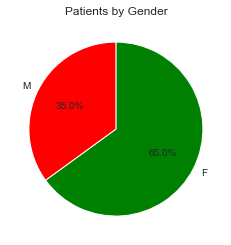

In [20]:
# Check Patients distribution by Gender
counts = no_df["Gender"].value_counts() 
sns.set_style("whitegrid") # Build background
colors = ["green", "red"] # Set colors
sns.color_palette(colors)
sns.set_palette(colors)
plt.figsize = (24, 12) # Set figsize
plt.pie(counts.values, labels = counts.index, autopct = "%1.1f%%", startangle = 90, counterclock = False)
plt.title("Patients by Gender") # Set title
plt.show()

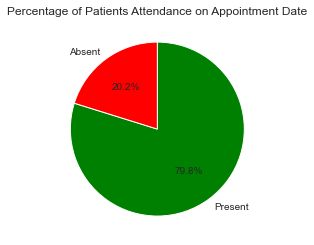

In [52]:
# Check how many people didn't show up at the appointment date
counts = no_df["Presence"].value_counts()
sns.set_style("whitegrid") # Set background
colors = ["green", "red"] # set colors
sns.color_palette(colors)
sns.set_palette(colors)
plt.figsize = (24, 12) 
plt.pie(counts.values, labels = counts.index, autopct = "%1.1f%%", startangle = 90, counterclock = False)
plt.title("Percentage of Patients Attendance on Appointment Date")
plt.show()

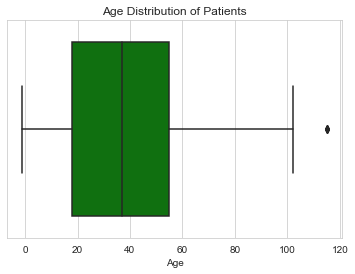

In [55]:
# create boxplot for age availability
color = "green"
marker = "D"

sns.boxplot(x = no_df["Age"], color = color)
plt.title("Age Distribution of Patients")
plt.show()

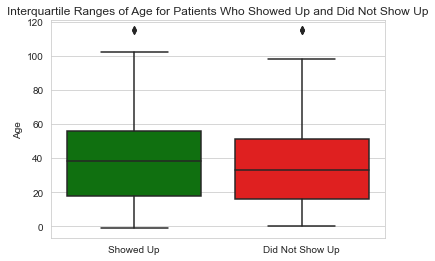

In [54]:
# create two new dataframes based on whether people showed up or not
showed_up = no_df[no_df['Presence'] == "Present"]
did_not_show_up = no_df[no_df['Presence'] == "Absent"]

# calculate the interquartile ranges for the age column of each DataFrame
showed_up_iqr = np.percentile(showed_up['Age'], 75) - np.percentile(showed_up['Age'], 25)
did_not_show_up_iqr = np.percentile(did_not_show_up['Age'], 75) - np.percentile(did_not_show_up['Age'], 25)

# plot the boxplots
sns.boxplot(data = [showed_up['Age'], did_not_show_up['Age']])
plt.xticks([0, 1], ['Showed Up', 'Did Not Show Up'])
plt.title('Interquartile Ranges of Age for Patients Who Showed Up and Did Not Show Up')
plt.ylabel('Age')
plt.show();

In [56]:
# Inspect 'did_not_show_up' dataset
did_not_show_up.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Presence,Waiting Time Days,WeekDay,Month,Hour
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Absent,1,Friday,April,15
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Absent,1,Friday,April,15
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Absent,2,Friday,April,8
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Absent,0,Friday,April,9
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Absent,1,Friday,April,7


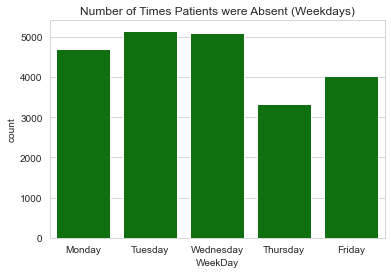

In [70]:
# Create countplot to check what weekdays most patients are absent
sns.countplot(x = did_not_show_up["WeekDay"],
              color = "green",
              order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
plt.title("Number of Times Patients were Absent (Weekdays)")
plt.show();

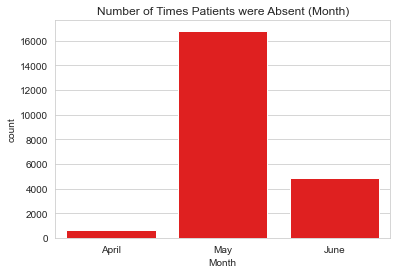

In [71]:
# Create countplot to check what month most patients are absent
sns.countplot(x = did_not_show_up["Month"],
              color = "red")
plt.title("Number of Times Patients were Absent (Month)")
plt.show();